In [1]:
import os
import csv
import re
import sample_package.commonFunction as basefunc
import sample_package.filterMethod as filter_TFID
from nltk.corpus import stopwords

from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy  import array
import numpy as np
from scipy.misc import toimage

# = function 

# = init

sid = SentimentIntensityAnalyzer()

foundCnt = 0;
foundMax = 1000;
sentimentCnt =3
lenght = 27
magicNumber = lenght*lenght
zt = []
yt = []


# = main 

# get Game Infomation

    
print("--- programming start---")


teamNameList = ["Thunder"] # , "Blazers","Grizzlies","Thunder"

for teamName in teamNameList:

    gameInfo = basefunc.getGameInfo(teamName);

    for eachGameInfo in gameInfo:

        # Game data and time
        gameDate = eachGameInfo.Date
        gameTime = eachGameInfo.Time


        print("Team: {} Date: {} {}".format(teamName, gameDate, eachGameInfo.result))
        fileName = basefunc.getCvsPathByGameData(teamName, gameDate)
        foundCnt+=1

        if(len(fileName)>=1):
        # read file to ...
            tweetsfile = open(fileName[0], 'r')
            tweets = csv.reader(tweetsfile)
            csvTitle = next(tweets, None)

            tweetCnt = 0
            totalList =[]
            
            # get each tweet
            for row in tweets:
                
                # get tweet's sentiment
                tpresult = sid.polarity_scores(row[0])
    #             print(tpresult)
                if(tpresult["compound"] != 0):
                    tweetCnt+=1
                    tplist = [tpresult['neg'], tpresult['neu'],tpresult['pos'],tpresult['compound']]
                    totalList.append(tplist)
                if(tweetCnt>=magicNumber):
                    break

            if len(totalList) == magicNumber:
                a = array(totalList)
                b = a[a[:, 3].argsort()]
                c = b.tolist()
                zt.append(c)
                if(eachGameInfo.result == "W"):
                    yt.append(0)
                else:
                    yt.append(1)

        # show only one result then break
        if foundCnt >= foundMax:
            break;
        
        

x_result = array( zt )
y_result = array( yt)
print(x_result.shape)
print(y_result.shape)
print("--- This code just use part of data---")
print("--- programming end---")


--- programming start---
Get result from /Users/cosoet/SIT/BIA660-WebAnalytics/FinalProject/PythonCode/GameResult/Thunder.csv
Team: Thunder Date: 2016-10-26 W
Team: Thunder Date: 2016-10-28 W
Team: Thunder Date: 2016-10-30 W
Team: Thunder Date: 2016-11-02 W
Team: Thunder Date: 2016-11-03 L
Team: Thunder Date: 2016-11-05 W
Team: Thunder Date: 2016-11-07 W
Team: Thunder Date: 2016-11-09 L
Team: Thunder Date: 2016-11-11 L
Team: Thunder Date: 2016-11-13 L
Team: Thunder Date: 2016-11-14 L
Team: Thunder Date: 2016-11-16 W
Team: Thunder Date: 2016-11-18 W
Team: Thunder Date: 2016-11-20 L
Team: Thunder Date: 2016-11-22 L
Team: Thunder Date: 2016-11-23 L
Team: Thunder Date: 2016-11-25 W
Team: Thunder Date: 2016-11-26 W
Team: Thunder Date: 2016-11-28 W
Team: Thunder Date: 2016-11-30 W
Team: Thunder Date: 2016-12-04 W
Team: Thunder Date: 2016-12-05 W
Team: Thunder Date: 2016-12-09 L
Team: Thunder Date: 2016-12-11 W
Team: Thunder Date: 2016-12-13 L
Team: Thunder Date: 2016-12-14 L
Team: Thunder Da

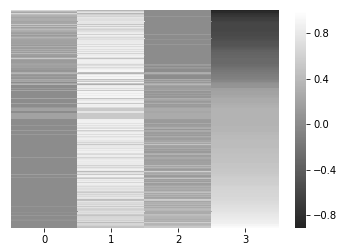

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

# show the sentiment table as an image

pal = sns.dark_palette("white", as_cmap=True)
df1 = pd.DataFrame(x_result[1])
sns.heatmap(df1, cmap=pal, yticklabels=False);


In [4]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(\
                x_result, y_result, test_size=0.1, random_state=0)

print(X_train.shape)
print(X_train)

/Users/cosoet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(70, 729, 4)
[[[ 0.402   0.598   0.     -0.9146]
  [ 0.392   0.608   0.     -0.8834]
  [ 0.319   0.681   0.     -0.872 ]
  ...
  [ 0.      0.546   0.454   0.9124]
  [ 0.      0.627   0.373   0.9165]
  [ 0.      0.588   0.412   0.9407]]

 [[ 0.93    0.07    0.     -0.9811]
  [ 0.458   0.542   0.     -0.9136]
  [ 0.388   0.612   0.     -0.908 ]
  ...
  [ 0.      0.554   0.446   0.9168]
  [ 0.      0.431   0.569   0.9214]
  [ 0.      0.485   0.515   0.9299]]

 [[ 0.647   0.353   0.     -0.9305]
  [ 0.463   0.413   0.124  -0.91  ]
  [ 0.56    0.44    0.     -0.9094]
  ...
  [ 0.      0.524   0.476   0.914 ]
  [ 0.      0.536   0.464   0.955 ]
  [ 0.      0.436   0.564   0.9657]]

 ...

 [[ 0.456   0.455   0.089  -0.92  ]
  [ 0.675   0.325   0.     -0.8854]
  [ 0.345   0.655   0.     -0.8747]
  ...
  [ 0.      0.612   0.388   0.8953]
  [ 0.      0.41    0.59    0.96  ]
  [ 0.      0.314   0.686   0.9712]]

 [[ 0.545   0.455   0.     -0.9211]
  [ 0.414   0.586   0.     -0.8999]
  [ 0.383   0

In [5]:
from keras.utils import np_utils
x_Train4D=X_train.reshape(X_train.shape[0],729,4,1).astype('float32')
x_Test4D=X_test.reshape(X_test.shape[0],729,4,1).astype('float32')
y_TrainOneHot = np_utils.to_categorical(y_train)

In [6]:
x_Train4D.shape

(70, 729, 4, 1)

In [8]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping

In [9]:
# This part build our CNN structure

model = Sequential()

# CNN first layer
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(729,4,1), 
                 activation='relu'))
# CNN second layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(filters=48,
                 kernel_size=(1,1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

In [10]:
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 729, 4, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 364, 2, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 364, 2, 36)        2340      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 364, 2, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 364, 2, 48)        1776      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 364, 2, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 364, 2, 48)        0         
__________

In [12]:

# set the early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

# training data
train_history=model.fit(x=x_Train4D, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=45, batch_size=20,verbose=2,callbacks=[early_stopping]) #,callbacks=[early_stopping]

Train on 56 samples, validate on 14 samples
Epoch 1/45
 - 1s - loss: 2.2885 - acc: 0.4375 - val_loss: 0.8874 - val_acc: 0.5714
Epoch 2/45
 - 0s - loss: 0.6985 - acc: 0.6071 - val_loss: 0.9723 - val_acc: 0.4286
Epoch 3/45
 - 0s - loss: 0.8670 - acc: 0.4643 - val_loss: 0.6886 - val_acc: 0.5714
Epoch 4/45
 - 0s - loss: 0.6998 - acc: 0.6339 - val_loss: 0.7138 - val_acc: 0.4286
Epoch 5/45
 - 0s - loss: 0.7081 - acc: 0.5893 - val_loss: 0.6813 - val_acc: 0.5714
Epoch 6/45
 - 0s - loss: 0.7655 - acc: 0.4821 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 7/45
 - 0s - loss: 0.6932 - acc: 0.5625 - val_loss: 0.6839 - val_acc: 0.5714
Epoch 8/45
 - 0s - loss: 0.6760 - acc: 0.5536 - val_loss: 0.6826 - val_acc: 0.5714
Epoch 9/45
 - 0s - loss: 0.7004 - acc: 0.5357 - val_loss: 0.6823 - val_acc: 0.5714
Epoch 10/45
 - 0s - loss: 0.7089 - acc: 0.4732 - val_loss: 0.7081 - val_acc: 0.4286
Epoch 11/45
 - 0s - loss: 0.6940 - acc: 0.5714 - val_loss: 0.6915 - val_acc: 0.4286
Epoch 12/45
 - 0s - loss: 0.7475 - acc: 0

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

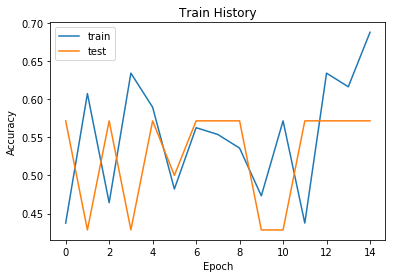

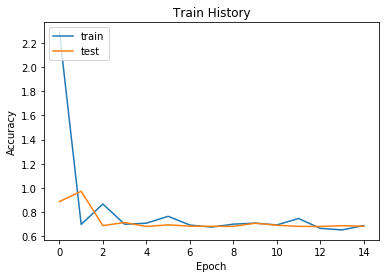

--- This code just use part of data---
--- So the accuracy is very low---
8/8 [==============================] - 0s 2ms/step


0.875

In [14]:
show_train_history('acc','val_acc')
show_train_history('loss','val_loss')

y_TestOneHot = np_utils.to_categorical(y_test)

print("--- This code just use part of data---")
print("--- So the accuracy is very low---")

scores = model.evaluate(x_Test4D , y_TestOneHot)
scores[1]